# Práctica 7b: análisis de regresión lineal múltiple

##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Resources
* [Chapter 10. Regression]()

## Recipe

El objetivo sigue siendo ajustar una línea que muestre mejor la relación entre una variable independiente $X$ y el objetivo $y$. La diferencia es que en la Regresión Lineal Múltiple, tenemos que tratar con al menos 2 características o variables independientes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
file = "http://www.sharecsv.com/dl/b62ab1baad4e7ace6404cd73ea19191e/50_Startups.csv"

In [3]:
# Importamos el conjunto de datos 
df = pd.read_csv(file) 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


En este conjunto de datos `50_startups` hay múltiples características o variables independientes (`R&D Spend`, `Administration`, `Marketing Spend`, `State`). Nuevamente, el objetivo aquí es revelar o descubrir una relación entre las variables independientes y el objetivo (`Profit`). Notar también que la característica `State`, contiene valores categóricos. ¿Cómo se maneja este tipo de datos? Una forma conveniente de hacerlo es transformando los datos categóricos (Nueva York, California, Florida) en datos numéricos. 

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State_encoded'] = label_encoder.fit_transform(df.State)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_encoded
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [5]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
state = one_hot_encoder.fit_transform(df.State_encoded.values.reshape(-1,1)).toarray()
state_encoded = pd.DataFrame(state, columns = ["State_" + str(int(i)) for i in range(state.shape[1])])

In [6]:
df = pd.concat([state_encoded, df], axis=1)
df.drop(labels=["State", "State_encoded"], axis=1, inplace=True)

In [7]:
df.head()

,State_0,State_1,State_2,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df),
                 columns=df.columns)
df_sc.head()

,State_0,State_1,State_2,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,1.0,1.000000,0.651744,1.000000,1.000000
1,1.0,0.0,0.0,0.983359,0.761972,0.940893,0.997355
2,0.0,1.0,0.0,0.927985,0.379579,0.864664,0.993178
3,0.0,0.0,1.0,0.873136,0.512998,0.812235,0.947292
4,0.0,1.0,0.0,0.859438,0.305328,0.776136,0.853171


In [24]:
# Definimos quién es X y quién y
X = df_sc.iloc[:, :-1].values
y = df_sc.iloc[:, 5].values

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import Ridge 
model = Ridge()
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))
y_pred

Desempeño del modelo:  0.9258818039554135


array([0.321672  , 0.5275856 , 0.53052388, 0.36163189, 0.82902869,
       0.6137369 , 0.34897842, 0.24991786, 0.58825842, 0.76354282])

In [30]:
#Aplicamos PCA para visualizar los resultados
#features = ["State_0", "State_1", "State_2", "R&D Spend", "Administration", "Marketing Spend"]
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(X_train))
df_pca.head()

,0,1,2,3,4,5
0,0.141403,0.897688,-0.176654,0.144924,-0.034307,2.773566e-16
1,0.669303,-0.412499,-0.227000,0.289785,0.026277,-4.943661e-17
2,0.145413,0.889804,-0.139480,-0.224637,-0.091911,-1.343509e-17
3,-0.711955,-0.203448,0.063331,-0.193743,0.216802,2.213880e-17
4,0.180788,0.919578,0.107822,0.109774,-0.036956,-1.630110e-17


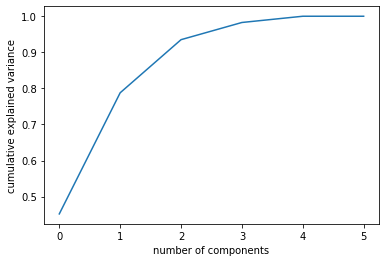

In [33]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.141403,0.897688,-0.176654,0.144924,-0.034307,2.773566e-16
1,0.669303,-0.412499,-0.227000,0.289785,0.026277,-4.943661e-17
2,0.145413,0.889804,-0.139480,-0.224637,-0.091911,-1.343509e-17
3,-0.711955,-0.203448,0.063331,-0.193743,0.216802,2.213880e-17
4,0.180788,0.919578,0.107822,0.109774,-0.036956,-1.630110e-17


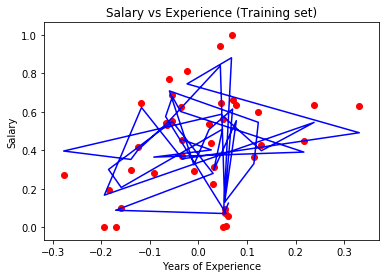

In [41]:
# Visualising the Training set results
plt.scatter(df_pca.PC5, y_train, color = 'red') 
plt.plot(df_pca.PC5, model.predict(X_train), color = 'blue') 
plt.title('Salary vs Experience (Training set)') 
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()